# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.200289e+01     1.454467e+01
 * time: 0.005261898040771484
     1     6.046576e+01     9.704580e+00
 * time: 0.014676809310913086
     2     5.600278e+01     1.342225e+01
 * time: 0.036894798278808594
     3     3.834285e+01     8.853759e+00
 * time: 0.210892915725708
     4     2.860652e+01     7.242686e+00
 * time: 0.24387001991271973
     5     2.110059e+01     5.436010e+00
 * time: 0.2709629535675049
     6     2.077883e+01     6.471797e+00
 * time: 0.29473090171813965
     7     9.501739e+00     2.286331e+00
 * time: 0.3187689781188965
     8     6.752361e+00     2.244869e+00
 * time: 0.3413078784942627
     9     6.242284e+00     1.328768e+00
 * time: 0.3638739585876465
    10     6.080685e+00     1.415595e+00
 * time: 0.382282018661499
    11     5.993464e+00     1.201395e+00
 * time: 0.40092897415161133
    12     5.910314e+00     8.377229e-01
 * time: 0.41904592514038086
    13     5.840276e+00     7.393215e-01
 * time: 0.43

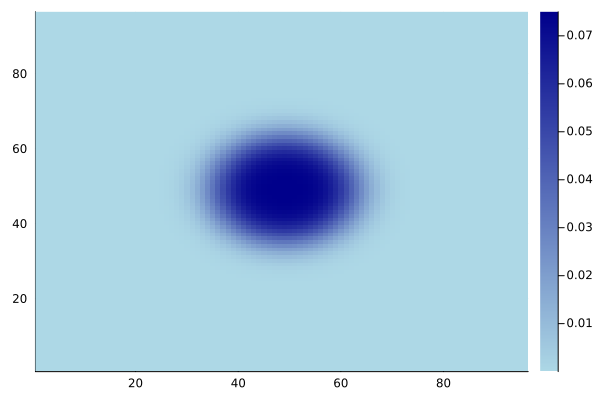

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)